# <center>Exploratory Data Analysis (EDA)

In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

import pre_processing_funcs as pre

from sklearn.preprocessing import PowerTransformer

In [11]:
pot = PowerTransformer(copy=False)

In [6]:
df = pre.set_index(pd.read_csv("data/half_cleaned.csv"))
df.head()

,Promotion Name,Store Kind,Store Sales,Store Cost,Is Recyclable?,Store Area,Grocery Area,Frozen Area,Meat Area,Cost,...,Department,Video Store,Bar For Salad,Florist,Coffee Bar,Ready Food,Gross Weight,Net Weight,Package Weight,Min. Person Yearly Income
id,,,,,,,,,,,,,,,,,,,,,
mc_ID_0,Dimes Off,Deluxe,8760000.0,4292400.0,True,2842.23,2037.64,481.98,323.00,602.7575,...,Household,1,1,1,1,1,28.1997,26.6008,1.5990,10000.0
mc_ID_1,Budget Bargains,Supermarket,6360000.0,1971600.0,False,2814.95,2049.72,457.36,NaN,708.6650,...,Snack Foods,0,0,0,0,0,16.5710,14.9720,1.5990,50000.0
mc_ID_2,Shelf Emptiers,Supermarket,10860000.0,4452600.0,True,2192.32,1322.21,523.32,348.85,564.2647,...,Periodicals,0,0,1,0,0,28.6358,27.1822,1.4536,30000.0
mc_ID_3,Savings Galore,NaN,1980000.0,673200.0,True,1974.73,NaN,440.92,293.95,724.5119,...,Dairy,0,0,0,1,0,14.2161,11.2944,2.9217,30000.0
mc_ID_4,Sale Winners,Deluxe,11560000.0,4970800.0,False,2862.30,1872.19,593.93,395.95,519.7574,...,Produce,1,1,1,1,1,12.6172,9.7100,2.9072,50000.0


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 38862 entries, mc_ID_0 to mc_ID_6465
Data columns (total 29 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Promotion Name             33034 non-null  object 
 1   Store Kind                 33053 non-null  object 
 2   Store Sales                38847 non-null  float64
 3   Store Cost                 38855 non-null  float64
 4   Is Recyclable?             38862 non-null  bool   
 5   Store Area                 35296 non-null  float64
 6   Grocery Area               35255 non-null  float64
 7   Frozen Area                35309 non-null  float64
 8   Meat Area                  35313 non-null  float64
 9   Cost                       38831 non-null  float64
 10  Marriage                   38862 non-null  bool   
 11  Gender                     38862 non-null  bool   
 12  Children                   38862 non-null  int64  
 13  Degree                     38862 non-nul

In [8]:
df.isnull().sum()

Promotion Name               5828
Store Kind                   5809
Store Sales                    15
Store Cost                      7
Is Recyclable?                  0
Store Area                   3566
Grocery Area                 3607
Frozen Area                  3553
Meat Area                    3549
Cost                           31
Marriage                        0
Gender                          0
Children                        0
Degree                          0
Work                            0
Store Code                      0
Country ISO2                    0
Oreder Brand                    2
Order                           2
Department                      2
Video Store                     0
Bar For Salad                   0
Florist                         0
Coffee Bar                      0
Ready Food                      0
Gross Weight                 2917
Net Weight                   2893
Package Weight               5366
Min. Person Yearly Income       8
dtype: int64

In [9]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Store Sales,38847.0,6.532023e+06,3.464866e+06,510000.0000,3.800000e+06,5.920000e+06,8.670000e+06,1.990000e+07
Store Cost,38855.0,2.612793e+06,1.450158e+06,163200.0000,1.495050e+06,2.376000e+06,3.478000e+06,9.726500e+06
Store Area,35296.0,2.597994e+03,5.287963e+02,1882.7000,2.189410e+03,2.572860e+03,2.863823e+03,7.857550e+03
Grocery Area,35255.0,1.775510e+03,3.712983e+02,1233.0800,1.507545e+03,1.734500e+03,2.052610e+03,8.103200e+03
Frozen Area,35309.0,4.935420e+02,1.459712e+02,227.8000,4.409200e+02,4.702700e+02,5.342900e+02,1.783640e+03
Meat Area,35313.0,3.289419e+02,9.712062e+01,149.9000,2.932700e+02,3.135500e+02,3.561900e+02,5.707400e+02
Cost,38831.0,5.192246e+02,1.568752e+02,265.6317,3.642695e+02,5.152596e+02,6.622226e+02,7.831925e+02
Children,38862.0,2.839946e+00,1.289001e+00,1.0000,2.000000e+00,3.000000e+00,4.000000e+00,5.000000e+00
Video Store,38862.0,3.554887e-01,4.786673e-01,0.0000,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00
Bar For Salad,38862.0,5.874633e-01,4.922971e-01,0.0000,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00


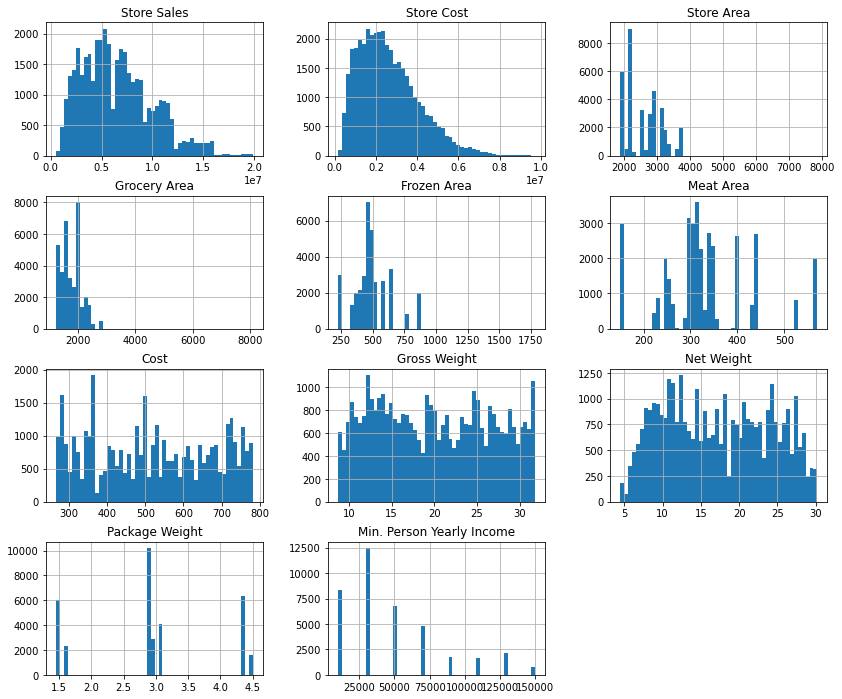

In [12]:
df.select_dtypes(float).hist(bins=50, figsize=(14, 12));

In [7]:
# df["Store Sales"] = np.sqrt(df["Store Sales"])
# df["Store Cost"] = np.cbrt(df["Store Cost"])
# df["Gross Weight"] = np.sqrt(df["Gross Weight"])
# df["Net Weight"] = np.sqrt(df["Net Weight"])

In [16]:
df[df.select_dtypes(float).columns] = pot.fit_transform(df.select_dtypes(float))

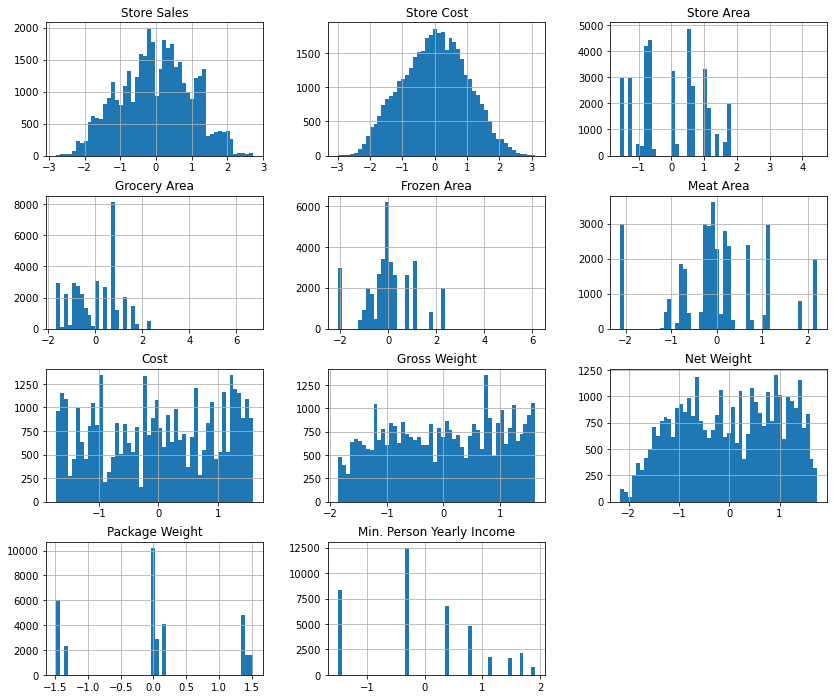

In [17]:
df.select_dtypes(float).hist(bins=50, figsize=(14, 12));

In [10]:
"""trans_cols = ["Store Sales", "Store Cost", "Gross Weight", "Net Weight"]

for col in trans_cols:
    logg = np.log(df[col])
    sqrtt = np.sqrt(df[col])
    cbrtt = np.cbrt(df[col])
    
    print(col)
    
    plt.figure(figsize=(16, 5))
    plt.subplot(1, 3, 1)
    logg.hist(bins=50)
    plt.title('Log')

    plt.subplot(1, 3, 2)
    sqrtt.hist(bins=50)
    plt.title('Square Root')

    plt.subplot(1, 3, 3)
    cbrtt.hist(bins=50)
    plt.title('Cube Root')

    plt.show()"""

'trans_cols = ["Store Sales", "Store Cost", "Gross Weight", "Net Weight"]\n\nfor col in trans_cols:\n    logg = np.log(df[col])\n    sqrtt = np.sqrt(df[col])\n    cbrtt = np.cbrt(df[col])\n    \n    print(col)\n    \n    plt.figure(figsize=(16, 5))\n    plt.subplot(1, 3, 1)\n    logg.hist(bins=50)\n    plt.title(\'Log\')\n\n    plt.subplot(1, 3, 2)\n    sqrtt.hist(bins=50)\n    plt.title(\'Square Root\')\n\n    plt.subplot(1, 3, 3)\n    cbrtt.hist(bins=50)\n    plt.title(\'Cube Root\')\n\n    plt.show()'

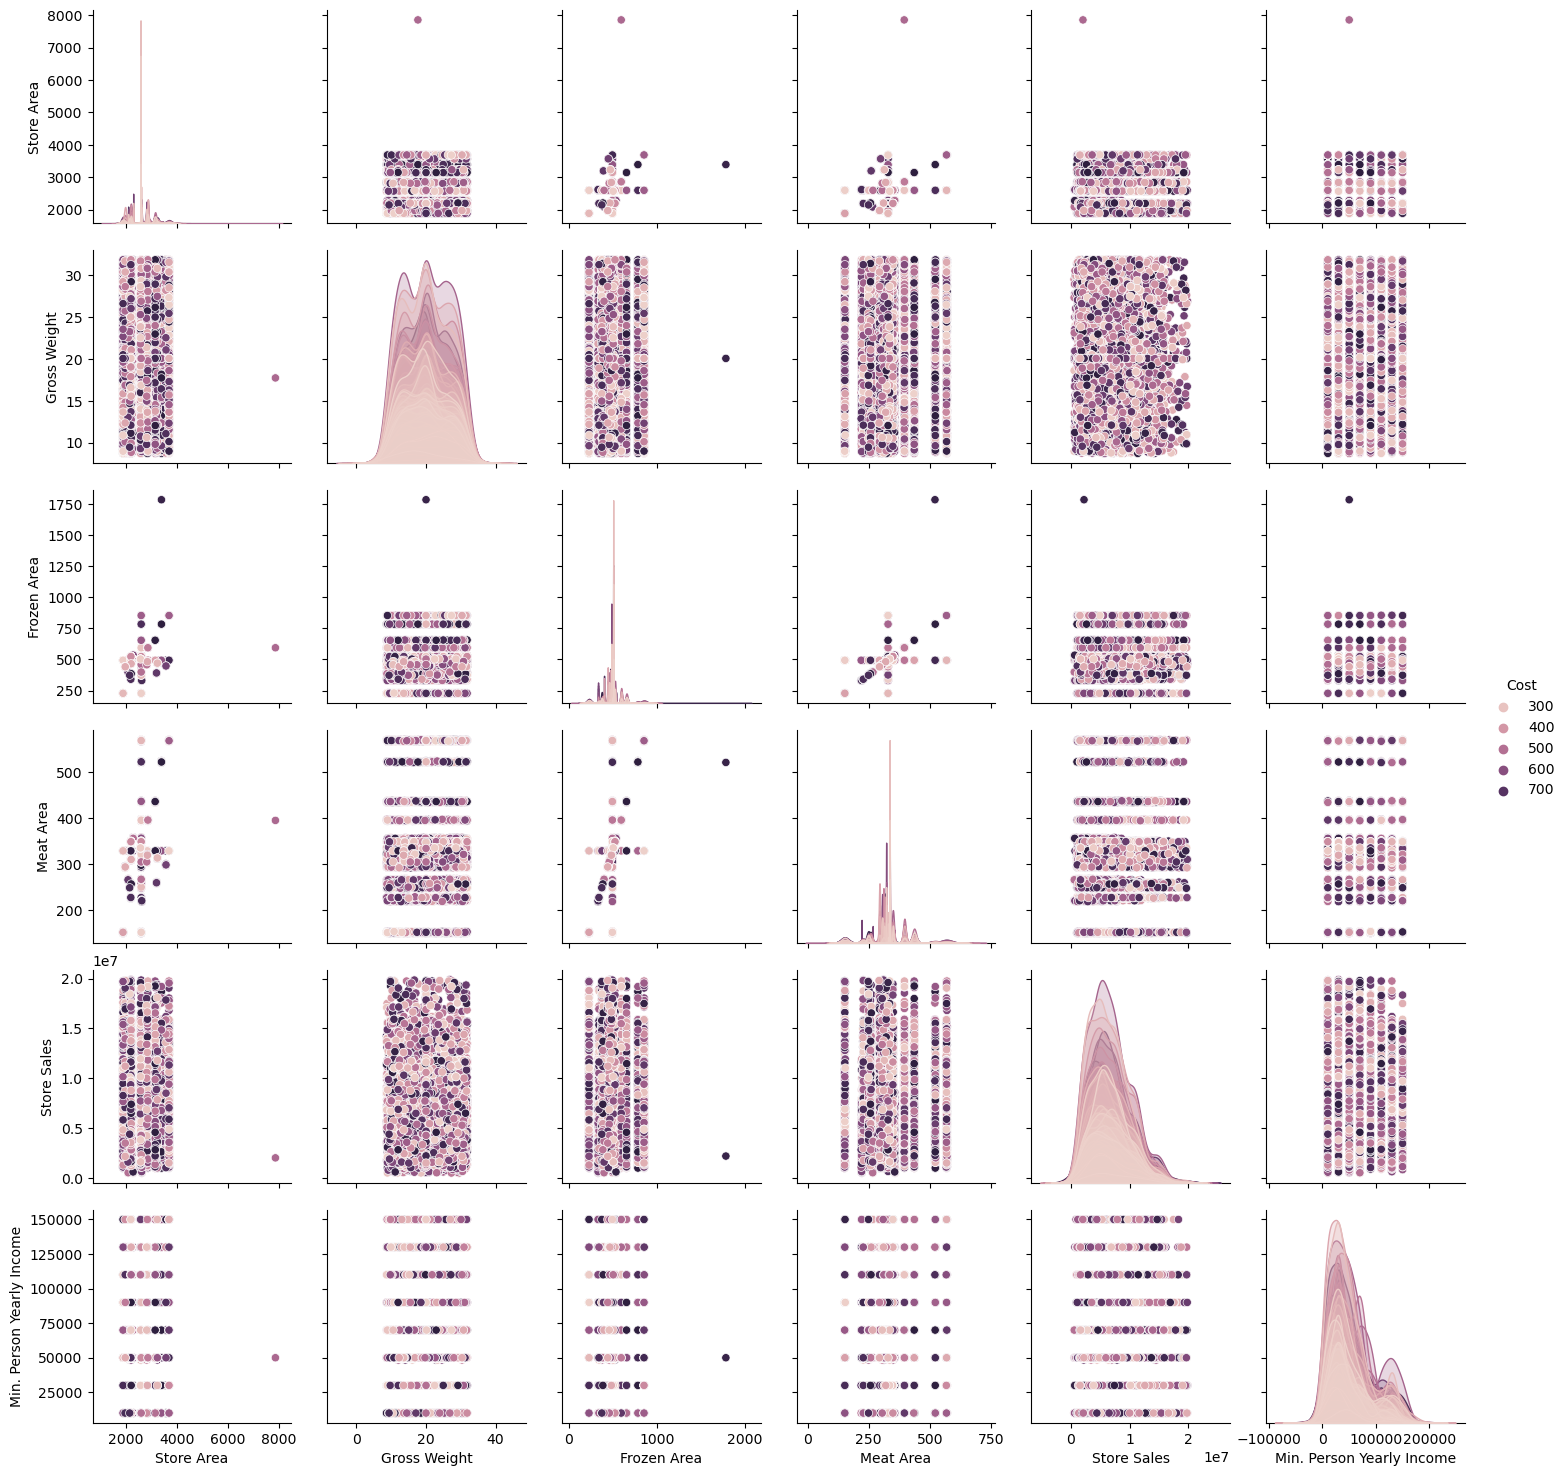

In [36]:
sns.pairplot(df, hue="Cost", vars=["Store Area",  "Gross Weight", "Frozen Area", "Meat Area","Store Sales","Min. Person Yearly Income"])
plt.show()

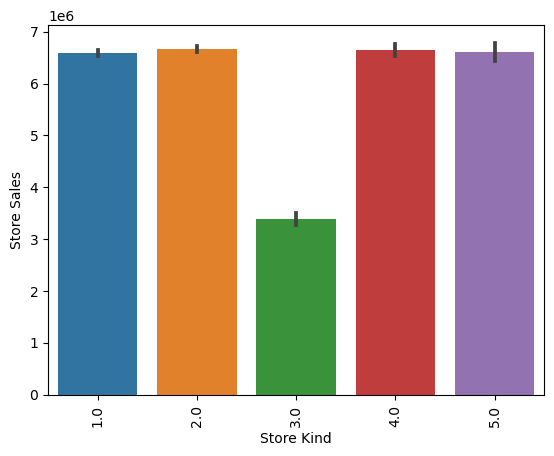

In [37]:
sns.barplot(x=df['Store Kind'],y=df['Store Sales'])
plt.xticks(rotation='vertical')
plt.show()

ValueError: num must be an integer with 1 <= num <= 4, not 5

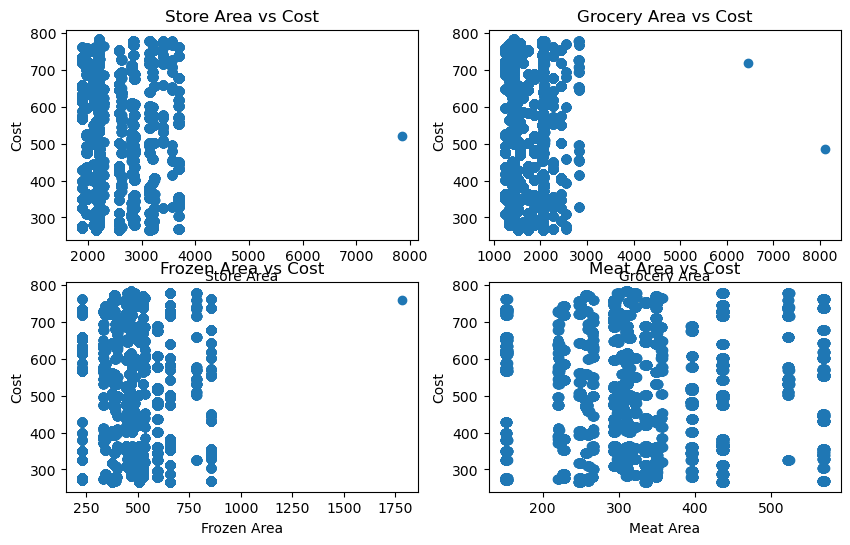

In [64]:
# Create scatter plots
plt.figure(figsize=(10, 6))

plt.subplot(221)
plt.scatter(df["Store Area"], df["Cost"])
plt.xlabel("Store Area")
plt.ylabel("Cost")
plt.title("Store Area vs Cost")

plt.subplot(222)
plt.scatter(df["Grocery Area"], df["Cost"])
plt.xlabel("Grocery Area")
plt.ylabel("Cost")
plt.title("Grocery Area vs Cost")

plt.subplot(223)
plt.scatter(df["Frozen Area"], df["Cost"])
plt.xlabel("Frozen Area")
plt.ylabel("Cost")
plt.title("Frozen Area vs Cost")

plt.subplot(224)
plt.scatter(df["Meat Area"], df["Cost"])
plt.xlabel("Meat Area")
plt.ylabel("Cost")
plt.title("Meat Area vs Cost")

plt.subplot(225)
plt.scatter(df["Gross Weight"], df["Cost"])
plt.xlabel("Gross Weight")
plt.ylabel("Cost")
plt.title("Gross Weight vs Cost")

plt.subplot(226)
plt.scatter(df["Net Weight"], df["Cost"])
plt.xlabel("Net Weight")
plt.ylabel("Cost")
plt.title("Net Weight vs Cost")

plt.subplot(227)
plt.scatter(df["Package Weight"], df["Cost"])
plt.xlabel("Package Weight")
plt.ylabel("Cost")
plt.title("Package Weight vs Cost")

plt.subplot(228)
plt.scatter(df["Min. Person Yearly Income"], df["Cost"])
plt.xlabel("Min. Person Yearly Income")
plt.ylabel("Cost")
plt.title("Min. Person Yearly Income vs Cost")

plt.tight_layout()
plt.show()


<Axes: >

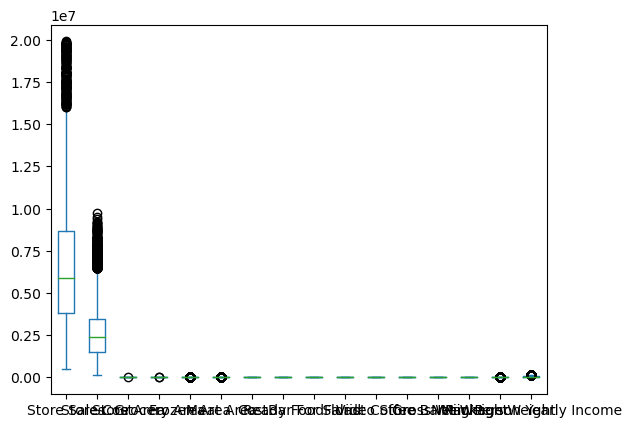

In [66]:
df.plot( kind = 'box' )

In [ ]:
df.value_counts().plot(x = 'Children' , y = 'Cost' ,  kind = 'bar' )

<Axes: xlabel='id,Place Code,Promotion Name,Store Kind,Store Sales,Store Cost,Is Recyclable?,Store Area,Grocery Area,Frozen Area,Meat Area,Cost,Marriage,Gender,Children,Degree,Work,Oreder Brand,Product,Department,Ready Food,Bar For Salad,Florist,Video Store,Coffee Bar,Gross Weight,Net Weight,Package Weight,Min. Person Yearly Income'>